<font size = 5> <b> Grant William Polonis Reg: 202072547

MSc Artificial Intelligence & Applications AI for Autonomous Systems

CS814 Coursework 2

Submission date: 23/11/2020

<font size = 4> <b> 6 men's morris

Here is a visual representation of a six men's morris board:



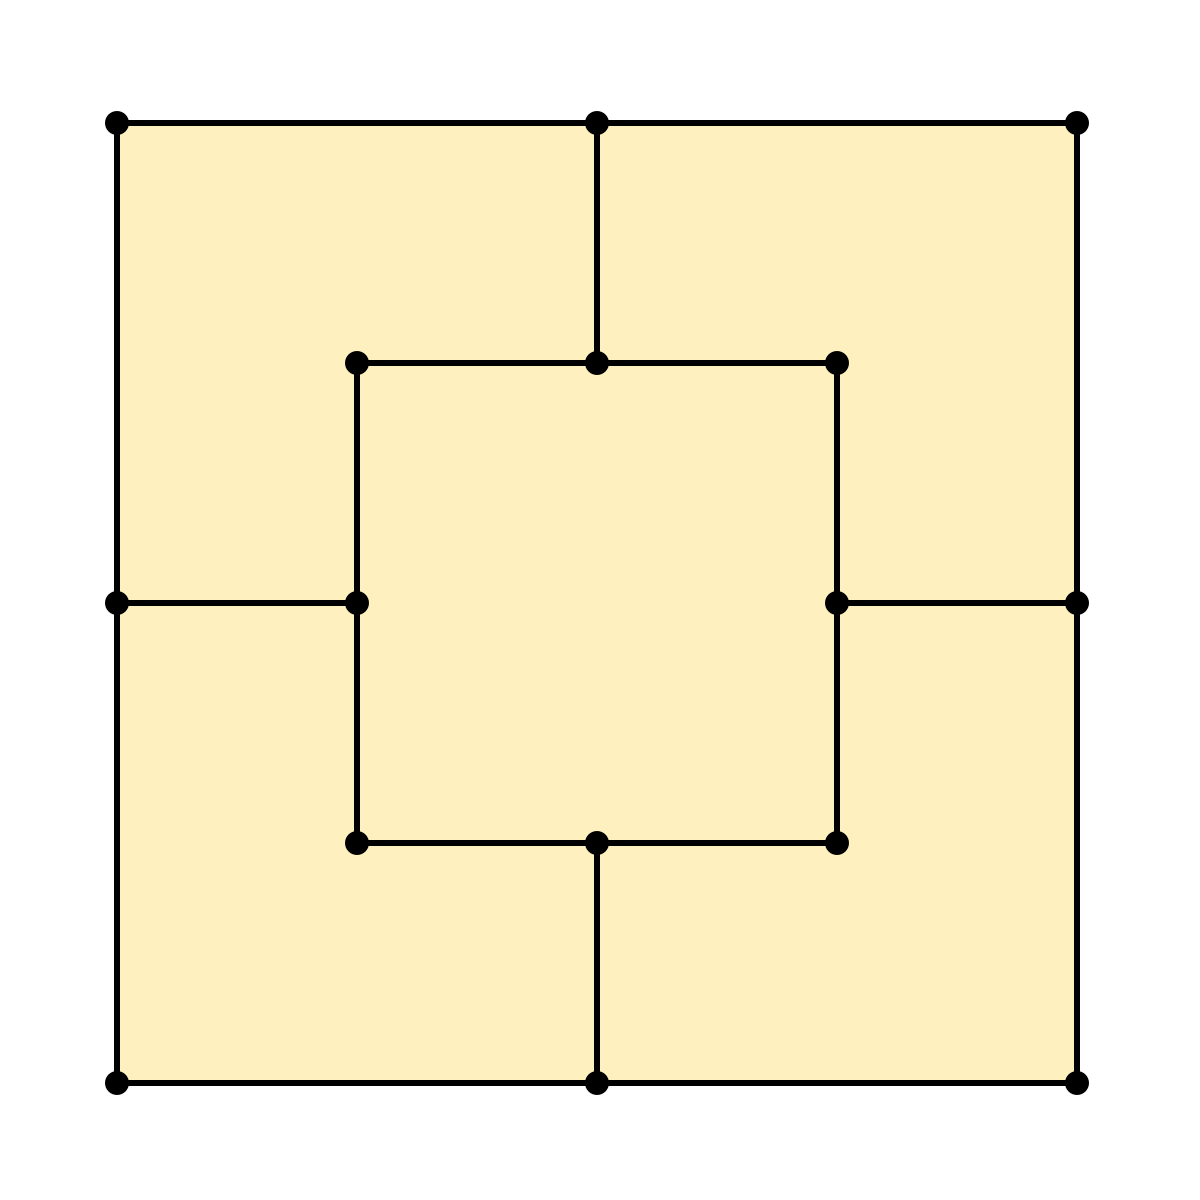

<font color = red> 1. Choose a formalism to represent all possible states. (15%)


Due to the attributes of Python, MiniMax and the complexity of the board, we will represent the board layers as a series of arrays. These arrays will all begin with 0 values to show there are no pieces on the position, and 1 to represent when a piece IS on the position. 

To illustrate:


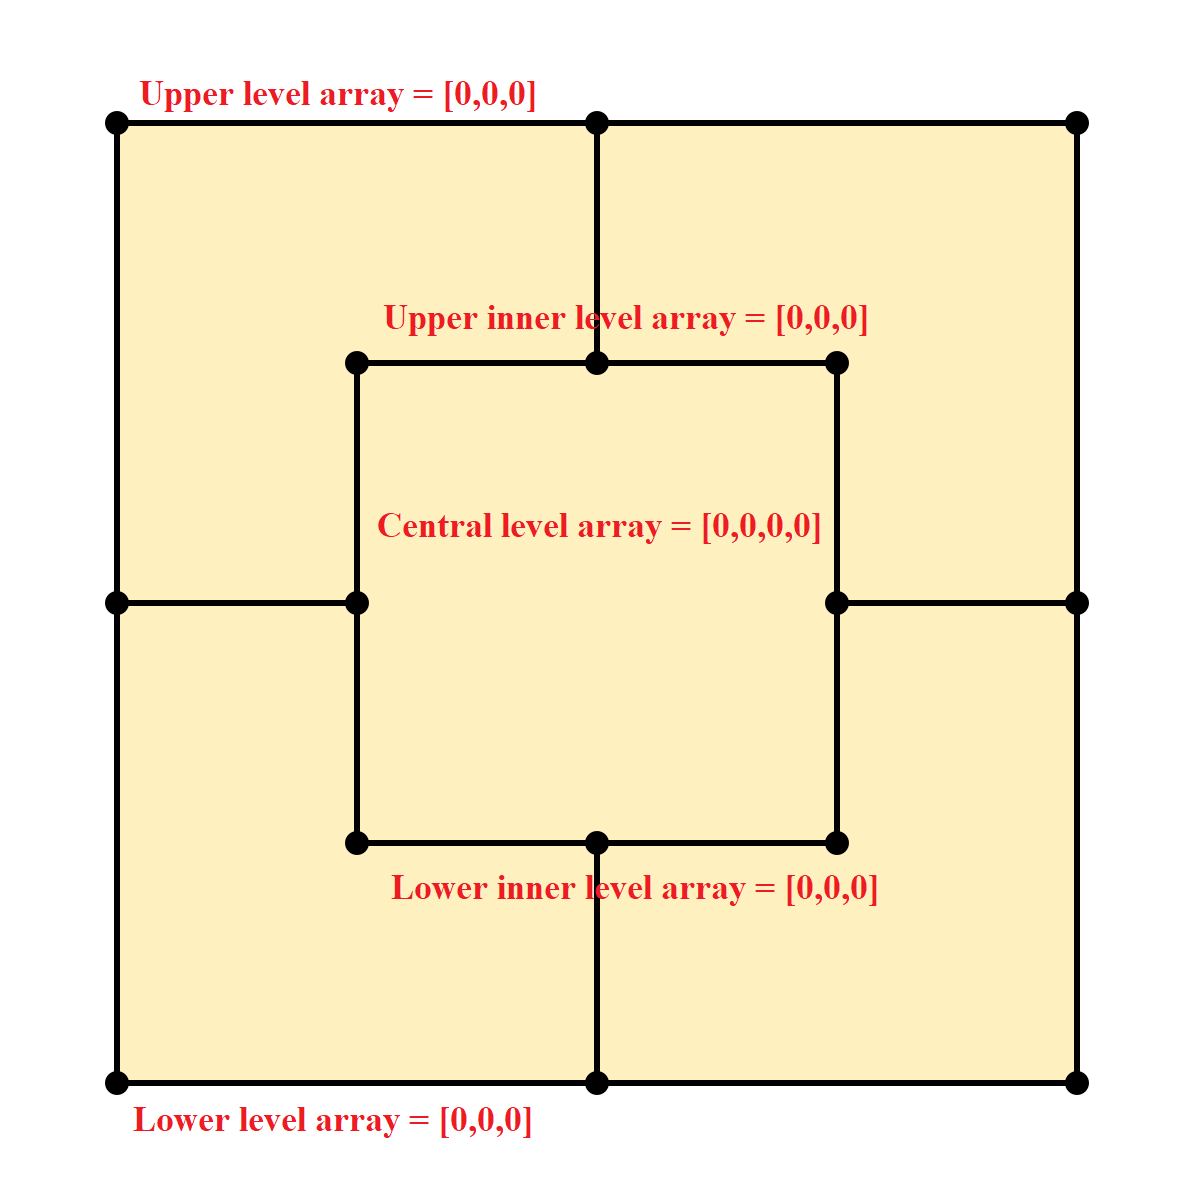

In [ ]:
import math
from IPython.display import clear_output

#Now to create the level arrays with corresponding start-state values as variables 
# state representation 2-D list of values of X, Y, or 0
upper = [0,0,0]
upper_inner = [0,0,0]
central = [0,0,0,0]
lower_inner = [0,0,0]
lower = [0,0,0]
maxDepth = 4
#gamestate = [upper, upper_inner, central, lower_inner, lower]

gamestate = [[0 for tj in range(4)] for ti in range(5)]
gamestate[0][3], gamestate[1][3], gamestate[3][3], gamestate[4][3] = "N/A", "N/A", "N/A", "N/A"
PlayerTurn = 'X'

def changePlayerTurn():
  global PlayerTurn
  if PlayerTurn == 'X':
    PlayerTurn = 'Y'
  else:
    PlayerTurn = 'X'
    

        
        

def testWin(gamestate):
    if (sum([counter.count('X') for counter in gamestate]) <=2):
        return 10 # there is 2 or less nodes for player 1 so return to indicate player 2 has won
        print("Human Wins!")
    if (sum([counter.count('Y') for counter in gamestate]) <=2):
        return -10 # there is 2 or less nodes for player 2 so player 1 wins
        print("AI Wins!")

        
        
#MINIMAX

def evalState(cur):
    sx = 0
    sy = 0
    #Check Rows
    #Check if there is a win in top row
    if (cur[0][0] in [0, 'X'] and cur[0][1] in [0, 'X'] and cur[0][2] in [0, 'X']):
        sx += 1
    if (cur[0][0] in [0, 'Y'] and cur[0][1] in [0, 'Y'] and cur[0][2] in [0, 'Y']):
        sy += 1
    #Check if there is a win in upper inner row
    if (cur[1][0] in [0, 'X'] and cur[1][1] in [0, 'X'] and cur[1][2] in [0, 'X']):
        sx += 1
    if (cur[1][0] in [0, 'Y'] and cur[1][1] in [0, 'Y'] and cur[1][2] in [0, 'Y']):
        sy += 1
    #Check if there is a win in lower inner row
    if (cur[3][0] in [0, 'X'] and cur[3][1] in [0, 'X'] and cur[3][2] in [0, 'X']):
        sx += 1
    if (cur[3][0] in [0, 'Y'] and cur[3][1] in [0, 'Y'] and cur[3][2] in [0, 'Y']):
        sy += 1
    #Check if there is a win in lower row
    if (cur[4][0] in [0, 'X'] and cur[4][1] in [0, 'X'] and cur[4][2] in [0, 'X']):
        sx += 1
    if (cur[4][0] in [0, 'Y'] and cur[4][1] in [0, 'Y'] and cur[4][2] in [0, 'Y']):
        sy += 1
        
    
    #Check Columns
    #Check if there is a win in leftmost column
    if (cur[0][0] in [0, 'X'] and cur[1][0] in [0, 'X'] and cur[2][0] in [0, 'X']):
        sx += 1
    if (cur[0][0] in [0, 'Y'] and cur[1][0] in [0, 'Y'] and cur[2][0] in [0, 'Y']):
        sy += 1
    #Check if there is a win in second column
    if (cur[0][1] in [0, 'X'] and cur[1][1] in [0, 'X'] and cur[2][1] in [0, 'X']):
        sx += 1
    if (cur[0][1] in [0, 'Y'] and cur[1][1] in [0, 'Y'] and cur[2][1] in [0, 'Y']):
        sy += 1
    #Check if there is a win in third column
    if (cur[0][2] in [0, 'X'] and cur[1][2] in [0, 'X'] and cur[2][2] in [0, 'X']):
        sx += 1
    if (cur[0][2] in [0, 'Y'] and cur[1][2] in [0, 'Y'] and cur[2][2] in [0, 'Y']):
        sy += 1
    #Check if there is a win in fourth column
    if (cur[0][3] in [0, 'X'] and cur[1][3] in [0, 'X'] and cur[2][3] in [0, 'X']):
        sx += 1
    if (cur[0][3] in [0, 'Y'] and cur[1][3] in [0, 'Y'] and cur[2][3] in [0, 'Y']):
        sy += 1
    return (sx - sy)
    

#this function will test who won
def checkWhoWon(cur):
  # check if X won
    if testWin(cur) == 10:
        print("AI won")
        return True
  # check if Y won
    if testWin(cur) == -10:
        print("Player won")
        return True
  # Keep playing
    return False
    
    
# The main function
def MinimaxDecision (cur):
  # check the Max value for all possible actions
    max_val = -math.inf
    actionI = 0
    actionJ = 0
    actionN = 0
    actionM = 0
    if check_mill(gamestate) == 'Y':
        for i in range(5):
            for j in range(4):
                if (cur[i][j] == 0):
                    nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                    nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                    nextState[i][j] = 'Y'
                    val = MinValue(nextState, -math.inf, math.inf, maxDepth)
                    if (val > max_val):
                        max_val = val
                        actionI = i
                        actionJ = j
                    # return the action that maximizes the output
                    
    elif pieces < 12:
        for i in range(5):
            for j in range(4):
                if cur[i][j] == 0:  # it is a possible action
                # create the nextState and send it to MinValue
                    nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                    nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                    nextState[i][j] = 'Y'
                    val = MinValue(nextState, -math.inf, math.inf, maxDepth)
                    if val > max_val:
                        max_val = val
                        actionI = i
                        actionJ = j
                        print(i, j)
                        
    elif pieces >= 12:
        for i in range(5):
            for j in range(4):
                for n in range(5):
                    for m in range(4):
                        if (cur[i][j] == 'Y') and (cur[n][m] == 0) and checkmove(i,j,n,m) == True: # it is a possible action
                        #create the nextState and send it to MinValue
                            nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                            nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                            nextState[i][j] = 'Y'
                            val = MinValue(nextState, -math.inf, math.inf, maxDepth)
                            if (val > max_val):
                                max_val = val
                                actionI = i
                                actionJ = j
                                actionN = n
                                actionM = m
                      # return the action that maximizes the output
    changePlayerTurn()
    return actionI, actionJ, actionN, actionM
    


def MaxValue (cur, alpha, beta, depth):
  # we have 2 terminal states: X Y
    if test_created_mill(cur) == 'Y':
        return 10
    if test_created_mill(cur) == 'X':
        return -10
    if testWin(cur) == 'Y':
        return 10
    if testWin(cur) == 'X':
        return -10
    if (depth == 0):
        return evalState(cur)
  # check the Max value for all possible actions
    maxVal = -math.inf
    for i in range(5):
        for j in range(4):
            if (cur[i][j] == 0 and not cur[i][j] != 'X' or 'Y'): # it is a possible action
            #create the nextState and send it to MinValue
                nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                nextState[i][j] = 'Y'
                val = MinValue(nextState, alpha, beta, depth-1)
                if (val > maxVal):
                    maxVal = val
                if (val >= beta):
                    return val
                if (val > alpha):
                    alpha = val
                  
    if pieces < 12:
        for i in range(5):
            for j in range(4):
                if cur[i][j] == '0':  # it is a possible action
                    # create the nextState and send it to MinValue
                    nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                    nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                    nextState[i][j] = 'Y'
                    val = MinValue(nextState, alpha, beta, depth - 1)
                    if val > maxVal:
                        maxVal = val
                    if val >= beta:
                        return val
                    if val > alpha:
                        alpha = val
    elif pieces >= 12:
        for i in range(5):
            for j in range(4):
                for n in range(5):
                    for m in range(4):
                        if cur[i][j] == 'Y' and cur[n][m] == "0" and checkmove(i, j, n, m) == True:  # It is a possible action
                            nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                            nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][
                                3] = "N/A", "N/A", "N/A", "N/A"
                            nextState[i][j] = '0'
                            nextState[n][m] = "Y"
                            val = MinValue(nextState, alpha, beta, depth - 1)
                            if val < maxVal:
                                maxVal = val
                            if val >= beta:
                                return val
                            if val > alpha:
                                alpha = val
                                
    return maxVal



def MinValue (cur, alpha, beta, depth):
  # we have 3 terminal states: X O Draw
    if test_created_mill(cur) == 'Y':
        return 10
    if test_created_mill(cur) == 'X':
        return -10
    if testWin(cur) == 'Y':
        return 10
    if testWin(cur) == 'X':
        return -10
    if (depth == 0):
        return evalState(cur)
  # check the Max value for all possible actions
    minVal = math.inf
    for i in range(5):
        for j in range(4):
            if (cur[i][j] == 0): # it is a possible action
        #create the nextState and send it to MinValue
                nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                nextState[i][j] = 'X'
                val = MaxValue(nextState, alpha, beta, depth-1)
                if (val < minVal):
                    minVal = val
                if (val <= alpha):
                    return val
                if (val < beta):
                    beta = val
                    
            elif pieces < 12:
                for i in range(5):
                    for j in range(4):
                        if cur[i][j] == '0':  # it is a possible action
                            # create the nextState and send it to MinValue
                            nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                            nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][3] = "N/A", "N/A", "N/A", "N/A"
                            nextState[i][j] = 'X'
                            val = MaxValue(nextState, alpha, beta, depth - 1)
                            if val < minVal:
                                minVal = val
                            if val <= alpha:
                                return val
                            if val < beta:
                                beta = val
            elif pieces >= 12:
                for i in range(5):
                    for j in range(4):
                        for n in range(5):
                            for m in range(4):
                                if cur[i][j] == 'X' and cur[n][m] == "0" and checkmove(i, j, n, m) == True:  # It is a possible action
                                    nextState = [[cur[ti][tj] for tj in range(4)] for ti in range(5)]
                                    nextState[0][3], nextState[1][3], nextState[3][3], nextState[4][
                                        3] = "N/A", "N/A", "N/A", "N/A"
                                    nextState[i][j] = '0'
                                    nextState[n][m] = "X"
                                    val = MaxValue(nextState, alpha, beta, depth - 1)
                                    if val < minVal:
                                        minVal = val
                                    if val <= alpha:
                                        return val
                                    if val < beta:
                                        beta = val
    return minVal
    

    
    
    

    
def removecountershuman(cur):
    removepiece_row = int(input("Please enter the row of the piece to remove: "))
    removepiece_column = int(input("Please enter the column of the piece to remove: "))
    if removepiece_row < 0 or removepiece_row > 4:
        removepiece_row = int(input("Error: Please re-enter valid row value: "))
        removepiece_column = int(input("Please enter the column of your move: "))
    if removepiece_column < 0 or removepiece_column >= 5:
        removepiece_row = int(input("Error: Please re-enter valid row value: "))
        removepiece_column = int(input("Error: Please re-enter valid column value: "))
    if removepiece_row == 2 and removepiece_column >= 4:
        print("Error: out of bounds. Please try again. ")
        removepiece_row = int(input("Please enter the row of your move first: "))
        removepiece_column = int(input("Please enter the column of your move: "))
    if gamestate[removepiece_row][removepiece_column] != 'Y':
        print("Error: not a piece that can be removed. Please try again. ")
        removepiece_row = int(input("Please enter the row of your move first: "))
        removepiece_column = int(input("Please enter the column of your move: "))
    gamestate[removepiece_row][removepiece_column] = 0
    printGameBoard(cur)
            
            


def removecounters(cur):
    #Check for mills in rows 
    if cur[0][0] == cur[0][1] and cur[0][1] == cur[0][2] and cur[0][0] != 0:
        return cur[1][0]
    if cur[1][0] == cur[1][1] and cur[1][1] == cur[1][2] and cur[1][0] != 0:
        return cur[0][0]
    if cur[2][0] == cur[2][1] and cur[2][1] == cur[2][2] and cur[2][0] != 0:
        return cur[2][0]
    if cur[3][0] == cur[3][1] and cur[3][1] == cur[3][2] and cur[3][0] != 0:
        return cur[3][0]
    if cur[4][0] == cur[4][1] and cur[4][1] == cur[4][2] and cur[4][0] != 0:
        return cur[4][0]
    #Check for mills in columns
    if cur[0][0] == cur[2][0] and cur[2][0] == cur[4][0] and cur[0][0] != 0:
        return cur[0][0]
    if cur[1][0] == cur[2][1] and cur[2][1] == cur[3][0] and cur[1][0] != 0:
        return cur[0][1]
    if cur[0][2] == cur[2][3] and cur[2][3] == cur[4][2] and cur[0][2] != 0:
        return cur[0][2]
    if cur[1][2] == cur[2][2] and cur[2][2] == cur[3][2] and cur[1][2] != 0:
        return cur[1][2]
    

def check_mill(cur):
    # check if X won
    if removecounters(cur) == 'Y':
        print("AI has made a mill")
        return "Y"
    # check if O won
    if removecounters(cur) == 'X':
        print("Player has made a mill")
        return "X"
    return False


# Function to check if a player has connected three pieces
def test_created_mill(cur):
    # Check for a connection of 3 in outer rows
    if cur[0][0] == cur[0][1] and cur[0][1] == cur[0][2] and cur[0][0] != "0":
        return cur[0][0]
    if cur[4][0] == cur[4][1] and cur[4][1] == cur[4][2] and cur[4][0] != "0":
        return cur[4][0]

    # Check for a connection of 3 in inner rows
    if cur[1][0] == cur[1][1] and cur[1][1] == cur[1][2] and cur[1][0] != "0":
        return cur[1][0]
    if cur[3][0] == cur[3][1] and cur[3][1] == cur[3][2] and cur[3][0] != "0":
        return cur[3][0]

    # Check for a connection of 3 in outer columns
    if cur[0][0] == cur[2][0] and cur[2][0] == cur[4][0] and cur[0][0] != "0":
        return cur[0][0]
    if cur[0][2] == cur[2][3] and cur[2][3] == cur[4][2] and cur[0][2] != "0":
        return cur[0][2]

    # Check for a connection of 3 in inner columns
    if cur[1][0] == cur[2][1] and cur[2][1] == cur[3][0] and cur[1][0] != "0":
        return cur[1][0]
    if cur[1][2] == cur[2][2] and cur[2][2] == cur[3][2] and cur[1][2] != "0":
        return cur[1][2]
    
    

def checkmove(i,j,n,m):
    #Top Row movements 
    if (i == 0 and j == 0 and n == 0 and m == 1):
        return True 
    if (i == 0 and j == 1 and n == 0 and m == 2):
        return True
    if (i == 0 and j == 2 and n == 0 and m == 1):
        return True 
    if (i == 0 and j == 1 and n == 0 and m == 0):
        return True 
    #Second Row movements
    if (i == 1 and j == 0 and n == 1 and m == 1):
        return True 
    if (i == 1 and j == 1 and n == 1 and m == 2):
        return True 
    if (i == 1 and j == 2 and n == 1 and m == 1):
        return True 
    if (i == 1 and j == 1 and n == 1 and m == 0):
        return True 
    #Third Row Movements 
    if (i == 2 and j == 0 and n == 2 and m == 1):
        return True 
    if (i == 2 and j == 2 and n == 2 and m == 3): #Central row 
        return True 
    if (i == 2 and j == 3 and n == 2 and m == 2):
        return True 
    if (i == 2 and j == 1 and n == 2 and m == 0):
        return True 
    #4th Row Movements 
    if (i == 3 and j == 0 and n == 3 and m == 1):
        return True 
    if (i == 3 and j == 1 and n ==3 and m == 2):
        return True 
    if (i == 3 and j == 2 and n == 3 and m == 1):
        return True 
    if (i == 3 and j == 1 and n == 3 and m == 0):
        return True 
    #5th Row Movements
    if (i == 4 and j == 0 and n == 4 and m == 1):
        return True 
    if (i == 4 and j == 1 and n ==4 and m == 2):
        return True 
    if (i == 4 and j == 2 and n == 4 and m == 1):
        return True 
    if (i == 4 and j == 1 and n == 4 and m == 0):
        return True
    #Check Column Moves 
    #First column
    if (i == 0 and j == 0 and n == 2 and m == 0):
        return True 
    if (i == 2 and j == 0 and n == 4 and m == 0):
        return True
    if (i == 4 and j == 0 and n == 2 and m == 0):
        return True 
    if (i == 2 and j == 0 and n == 0 and m == 0):
        return True 
    #Inner Leftmost Column 
    if (i == 1 and j == 0 and n == 2 and m == 1):
        return True 
    if (i == 2 and j == 1 and n == 3 and m == 0):
        return True 
    if (i == 3 and j == 0 and n == 2 and m == 1):
        return True 
    if (i == 2 and j == 1 and i == 1 and m == 0):
        return True 
    #Top Row middle node to upper central row middle node 
    if (i == 0 and j == 1 and n == 1 and m == 1):
        return True 
    if (i == 1 and j == 1 and n == 0 and m == 1):
        return True 
    #Inner Rightmost column 
    if (i == 1 and j == 2 and n == 2 and m == 2):
        return True 
    if (i == 2 and j == 2 and n == 3 and m == 2):
        return True
    if (i == 3 and j == 2 and n == 2 and m == 2):
        return True 
    if (i == 2 and j == 2 and n == 1 and m == 2):
        return True 
    #Lower-Inner Row middle node to lowest row middle node
    if (i == 3 and j == 1 and n == 4 and m == 1):
        return True 
    if (i == 4 and j == 1 and n == 3 and m == 1):
        return True 
    #Rightmost column 
    if (i == 0 and j == 2 and n == 2 and m == 3):
        return True 
    if (i == 2 and j == 3 and n == 4 and m == 2):
        return True 
    if (i == 4 and j == 2 and n == 2 and m == 3):
        return True 
    if (i == 2 and j == 3 and n == 0 and m == 2):
        return True 
    
    
def playermove(cur):
    if PlayerTurn == 'X':
        select_rMove = int(input('Please enter the row number of the piece you wish to move (0-4): '))
        select_cMove = int(input('Please enter the column number of the piece you wish to move (0-4): '))
        while cur[select_rMove][select_cMove] != 'X':
            print("Wrong input try again. ")
            select_rMove = int(input('Please enter the row number of the piece you wish to move (0-4): '))
            select_cMove = int(input('Please enter the column number of the piece you wish to move (0-4): '))
        cur[select_rMove][select_cMove] = 0
        new_rMove = int(input('Please enter the row number you wish to move counter to (0-4): '))
        new_cMove = int(input('Please enter the column number you wish to move counter to (0-4): '))
        while cur[new_rMove][new_cMove] != 0:
            print("This is not an empty place so you cannot move here. Try again: ")
            new_rMove = int(input('Please enter the row number you wish to move counter to (0-4): '))
            new_cMove = int(input('Please enter the column number you wish to move counter to (0-4): '))
        cur[new_rMove][new_cMove] = 'X'       
        while checkmove(select_rMove, select_cMove, new_rMove, new_cMove) == False:
            select_rMove = int(input('Please enter the row number of the piece you wish to move (0-4): '))
            select_cMove = int(input('Please enter the column number of the piece you wish to move (0-4): '))
            while cur[select_rMove][select_cMove] != 'X':
                print("Wrong input try again. ")
                select_rMove = int(input('Please enter the row number of the piece you wish to move (0-4): '))
                select_cMove = int(input('Please enter the column number of the piece you wish to move (0-4): '))
            cur[select_rMove][select_cMove] = 0
            new_rMove = int(input('Please enter the row number you wish to move counter to (0-4): '))
            new_cMove = int(input('Please enter the column number you wish to move counter to (0-4): '))
            while cur[new_rMove][new_cMove] != 0:
                print("This is not an empty place so you cannot move here. Try again: ")
                new_rMove = int(input('Please enter the row number you wish to move counter to (0-4): '))
                new_cMove = int(input('Please enter the column number you wish to move counter to (0-4): '))
            cur[new_rMove][new_cMove] = 'X'       
            



    
#this function will print the board
def printGameBoard(cur):
    clear_output()
    print("{}---------{}---------{}".format(gamestate[0][0], gamestate[0][1], gamestate[0][2]))
    print("|         |         |")
    print("|     {}---{}---{}     |".format(gamestate[1][0], gamestate[1][1], gamestate[1][2]))
    print("|     |       |     |")
    print("{}-----{}       {}-----{}".format(gamestate[2][0], gamestate[2][1], gamestate[2][2], gamestate[2][3]))
    print("|     |       |     |")
    print("|     {}---{}---{}     |".format(gamestate[3][0], gamestate[3][1], gamestate[3][2]))
    print("|         |         |")
    print("{}---------{}---------{}".format(gamestate[4][0], gamestate[4][1], gamestate[4][2]))
# Print gameBoard()
printGameBoard(gamestate)
pieces = 0 
while(True): 
    if (PlayerTurn == 'Y'):
        if pieces < 12:
        # Player X move - AI
            rMove, cMove, g, k = MinimaxDecision(gamestate)
        #now we have a valid X move
            gamestate[rMove][cMove] = 'Y'
        # Print gameBoard()
            printGameBoard(gamestate)
            pieces +=1
            
        if pieces >= 12:
            # Player X move - AI
            rMove, cMove, n, m = MinimaxDecision(gamestate)
            # now we have a valid X move
            gamestate[rMove][cMove] = '0'
            gamestate[n][m] = "Y"
            # Print gameBoard()
            printGameBoard(gamestate)
            if checkWhoWon(gamestate):
                break
            print(pieces)
    
    
    else:
        if pieces < 12:
            # Player X move
            rMove = int(input("Please enter the row of your move first: "))
            cMove = int(input("Please enter the column of your move: "))
            if rMove < 0 or rMove > 4:
                rMove = int(input("Error: Please re-enter valid row value: "))
                cMove = int(input("Please enter the column of your move: "))
            if cMove < 0 or cMove >= 5:
                rMove = int(input("Error: Please re-enter valid row value: "))
                cMove = int(input("Error: Please re-enter valid column value: "))
            if rMove == 2 and cMove >= 4:
                print("Error: out of bounds. Please try again. ")
                rMove = int(input("Please enter the row of your move first: "))
                cMove = int(input("Please enter the column of your move: "))
            if gamestate[rMove][cMove] != 0:
                print("Error: piece already placed here. Please try again. ")
                rMove = int(input("Please enter the row of your move first: "))
                cMove = int(input("Please enter the column of your move: "))
            gamestate[rMove][cMove] ='X'
            if check_mill(gamestate) == 'X':
                removecountershuman(gamestate)
            pieces +=1
            
        if pieces >= 12:
            playermove(gamestate)
            if check_mill(gamestate) == 'X':
                removecountershuman(gamestate)
            printGameBoard(gamestate)
            if checkWhoWon(gamestate):
                break
            print(pieces)
    
    
        # Print gameBoard()
        printGameBoard(gamestate)
        #if (checkWhoWon(gamestate)):
          #  break
        changePlayerTurn()
        print(str(pieces))

X---------Y---------0
|         |         |
|     0---0---0     |
|     |       |     |
X-----0       0-----0
|     |       |     |
|     0---0---0     |
|         |         |
X---------X---------Y
